In [278]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('../practice/data/train.zip', compression='zip', header=0, sep=',', quotechar='"')

In [279]:
df = df.drop('dropoff_datetime', axis=1)

In [280]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [281]:
df = df.sort_values(by='pickup_datetime')
df_train = df[:10 ** 6]
df_test = df[10 ** 6:]

In [282]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
627458,id0383213,2,2016-05-04 03:16:14,1,-73.994888,40.720451,-73.990753,40.660641,N,1057
1114651,id3411837,2,2016-05-04 03:16:27,5,-73.980377,40.745491,-73.821632,40.714710,N,1466
932402,id1520645,2,2016-05-04 03:16:27,1,-73.986580,40.741520,-73.995972,40.742619,N,201
398435,id0499841,1,2016-05-04 03:16:39,2,-73.987175,40.733391,-73.984650,40.760597,N,1123
449737,id2332924,1,2016-05-04 03:17:00,1,-73.937309,40.804222,-73.872566,40.774487,N,591
...,...,...,...,...,...,...,...,...,...,...
853710,id1255468,2,2016-06-30 23:58:52,1,-73.982750,40.745289,-73.969002,40.757950,N,472
419031,id2013516,1,2016-06-30 23:59:09,2,-73.955109,40.689564,-73.978203,40.685802,N,754
1008720,id0376262,1,2016-06-30 23:59:10,2,-73.873093,40.774097,-73.926704,40.856739,N,2546
405743,id2332349,2,2016-06-30 23:59:37,5,-73.998291,40.722618,-73.971779,40.762470,N,1442


# Задание 1
Постройте график соответствующий количеству поездок в зависимости от дня недели по обучающей выборке. Какой из этих графиков соответствует правильному?


In [283]:
df_days = pd.DataFrame()
df_days['day_name'] = df_test.pickup_datetime.dt.day_name()
df_days

,day_name
627458,Wednesday
1114651,Wednesday
932402,Wednesday
398435,Wednesday
449737,Wednesday
...,...
853710,Thursday
419031,Thursday
1008720,Thursday
405743,Thursday


In [284]:
df_days_sorted = df_days['day_name'].value_counts().sort_index().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df_days_sorted

day_name
Monday       56855
Tuesday      61460
Wednesday    71663
Thursday     74918
Friday       67107
Saturday     67429
Sunday       59212
Name: count, dtype: int64

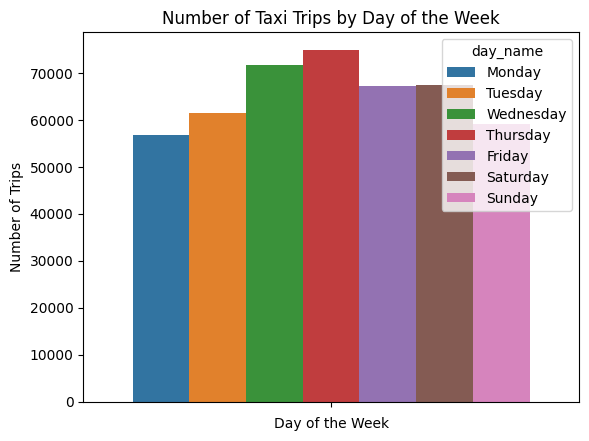

In [285]:
sns.barplot(hue=df_days_sorted.index, y=df_days_sorted.values)
plt.title('Number of Taxi Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

# Задание 2
Добавьте к признакам бинарную переменную, которая равна 1 для двух аномальных дней и 0 во все остальные дни.
Для этого вам понадобиться модифицировать функцию create_features.

In [286]:
import numpy as np
df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)

C:\Users\s-hro\AppData\Local\Temp\ipykernel_9868\3653886178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
C:\Users\s-hro\AppData\Local\Temp\ipykernel_9868\3653886178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)


In [287]:
from datetime import datetime
def create_features(data_frame):
  X = pd.concat([
      data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
      data_frame.pickup_datetime.apply(lambda x: x.hour),
      data_frame.pickup_datetime.apply(
        lambda x: 
        1 if x == datetime.strptime('2016-01-23', '%Y-%m-%d') or x == datetime.strptime('2016-05-04', '%Y-%m-%d')
        else 0
        )
     ], axis=1, keys=['day', 'hour', 'anomal']
  )

  return X, data_frame.log_trip_duration

In [288]:
X_train, y_train = create_features(df_train)
X_test, y_test = create_features(df_test)

In [289]:
X_train

,day,hour,anomal
96469,1,0,0
223872,1,0,0
713067,1,0,0
652463,1,0,0
722901,1,0,0
...,...,...,...
1384418,125,3,0
1100978,125,3,0
630885,125,3,0
567651,125,3,0


In [290]:
from sklearn.linear_model import LinearRegression

In [291]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [292]:
from sklearn.metrics import mean_squared_error

In [293]:
round(mean_squared_error(y_test, lin_reg.predict(X_test)),3)

0.662

In [294]:
from sklearn.linear_model import Lasso


In [277]:
lasso = Lasso(alpha=2.65e-05)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.6313491243367214


# Задание 3
1. Добавьте день недели в качестве признака для обучения. Удобнее всего - модифицировать функцию create_features.

2. Заново проведите one-hot кодирование. Сколько признаков у вас получилось?

In [237]:
def create_features_2(data_frame):
  X = pd.concat([
      data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
      data_frame.pickup_datetime.apply(lambda x: x.hour),
      data_frame.day_name,
      data_frame.pickup_datetime.apply(
        lambda x: 
        1 if x == datetime.strptime('2016-01-23', '%Y-%m-%d') or x == datetime.strptime('2016-05-04', '%Y-%m-%d')
        else 0
        ),
     ], axis=1, keys=['day_num', 'hour','day_name', 'anomal']
  )

  return X, data_frame.log_trip_duration

In [238]:
df_train = df[:10 ** 6]
df_test = df[10 ** 6:]

df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)
df['day_name'] = df.pickup_datetime.dt.day_name()

C:\Users\s-hro\AppData\Local\Temp\ipykernel_9868\1388035575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['log_trip_duration'] = np.log1p(df_train.trip_duration)
C:\Users\s-hro\AppData\Local\Temp\ipykernel_9868\1388035575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['log_trip_duration'] = np.log1p(df_test.trip_duration)


In [252]:
X_train, y_train = create_features_2(df_train)
X_test, y_test = create_features_2(df_test)

In [253]:
print(X_train)

        day_num  hour   day_name  anomal
0            74    17     Monday       0
1           164     0     Sunday       0
2            19    11    Tuesday       0
3            97    19  Wednesday       0
4            86    13   Saturday       0
...         ...   ...        ...     ...
999995       38    10     Sunday       0
999996       61     9    Tuesday       0
999997       13    22  Wednesday       0
999998       84    22   Thursday       0
999999       55    10  Wednesday       0

[1000000 rows x 4 columns]


In [254]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [255]:
ohe = ColumnTransformer(
    transformers=[("One hot", OneHotEncoder(sparse_output=False), ['day_name', 'hour'])],
    remainder="passthrough",
)

In [256]:
print(X_train.columns)
print(X_test.columns)
X_train

Index(['day_num', 'hour', 'day_name', 'anomal'], dtype='object')
Index(['day_num', 'hour', 'day_name', 'anomal'], dtype='object')


,day_num,hour,day_name,anomal
0,74,17,Monday,0
1,164,0,Sunday,0
2,19,11,Tuesday,0
3,97,19,Wednesday,0
4,86,13,Saturday,0
...,...,...,...,...
999995,38,10,Sunday,0
999996,61,9,Tuesday,0
999997,13,22,Wednesday,0
999998,84,22,Thursday,0


In [261]:
X_train_o = ohe.fit_transform(X_train)
X_test_o = ohe.transform(X_test)

In [295]:
X_train_o.shape

(1000000, 33)

# Вопрос 4

1. Отмасштабируйте единственный вещественный признак.
2. Обучите на полученных данных Lasso регрессию, в качества параметра  `alpha` возьмите 2.65e-05.

Какое качество в терминах MSE вы получили?

Сколько признаков было отобрано? В качестве критерия зануления признака используйте сравнение с $10^{-6}$ (с точностью до 3 знаков после запятой).


In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [199]:
alpha = 2.56e-05

In [216]:
scaler = StandardScaler()

In [ ]:
ohe = ColumnTransformer(
    transformers=
    [
        ('hour_scaler', StandardScaler(), ['hour']),    
        ("One hot", OneHotEncoder(sparse_output=False), ['day_name', 'hour'])
    ],
    remainder="passthrough",
)

In [265]:
X_train_o = ohe.fit_transform(X_train)
X_test_o = ohe.transform(X_test)

In [267]:
lasso = Lasso(alpha=2.65e-05)
lasso.fit(X_train_o, y_train)

y_pred = lasso.predict(X_test_o)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

coefficients = lasso.coef_
num_features_selected = sum(abs(coefficients) > 1e-6)
print(f'Количество отобранных признаков: {num_features_selected}')

MSE: 0.6227132333760812
Количество отобранных признаков: 31
